In [1]:
!pip install qiskit
!pip install pylatexenc

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.7 MB 4.7 MB/s 
     |████████████████████████████████| 18.0 MB 1.3 MB/s 
     |████████████████████████████████| 240 kB 54.4 MB/s 
     |████████████████████████████████| 54 kB 885 kB/s 
     |████████████████████████████████| 112 kB 43.7 MB/s 
     |████████████████████████████████| 37.5 MB 1.2 MB/s 
     |████████████████████████████████| 1.6 MB 47.0 MB/s 
     |████████████████████████████████| 49 kB 5.5 MB/s 
     |████████████████████████████████| 943 kB 49.9 MB/s 
     |████████████████████████████████| 49 kB 5.8 MB/s 
     |████████████████████████████████| 4.1 MB 40.5 MB/s 
     |████████████████████████████████| 112 kB 53.7 MB/s 
  Created wheel for qiskit: filename=qiskit-0.37.1-py3-none-any.whl size=12067 sha256=7a182393f0f82558ec49f153c72811b07b2e8083d5499d4e9f3402841ae793a0
  Stored in directory: /root/.cache/pip/wheels/1c/3c/a3/bf8c2

# Игра 'Lights'

Пример головоломки с сеткой 3 х 3 показан на рисунке ниже. Световые квадраты пронумерованы от 0 до 8. Мы можем представить начальный шаблон, используя список чисел, где «1» представляет включённый свет, а «0» представляет выключенный свет. Список «светов» ниже представляет собой начальный шаблон в этом примере (квадраты 3, 5, 6, 7 включены, а остальные выключены):

```python
lights = [0, 0, 0, 1, 0, 1, 1, 1, 0]
```

Пример головоломки можно решить, переключая переключатели в квадратах 0, 3 и 4, как показано на рисунке шаг за шагом. Если вы немного поиграете с ней, то вскоре заметите **два важных свойства этой игры-головоломки**:

1. Вам не нужно щелкать выключателем более одного раза.
2. Порядок нажатий не имеет значения.

Следовательно, мы можем представить решение головоломки в виде списка чисел, подобных исходному шаблону. Однако значения «0» и «1» здесь различны: «1» означает переключение переключателя, а «0» означает *не* переключение переключателя.

```python
solution = [1, 0, 0, 1, 1, 0, 0, 0, 0]
```

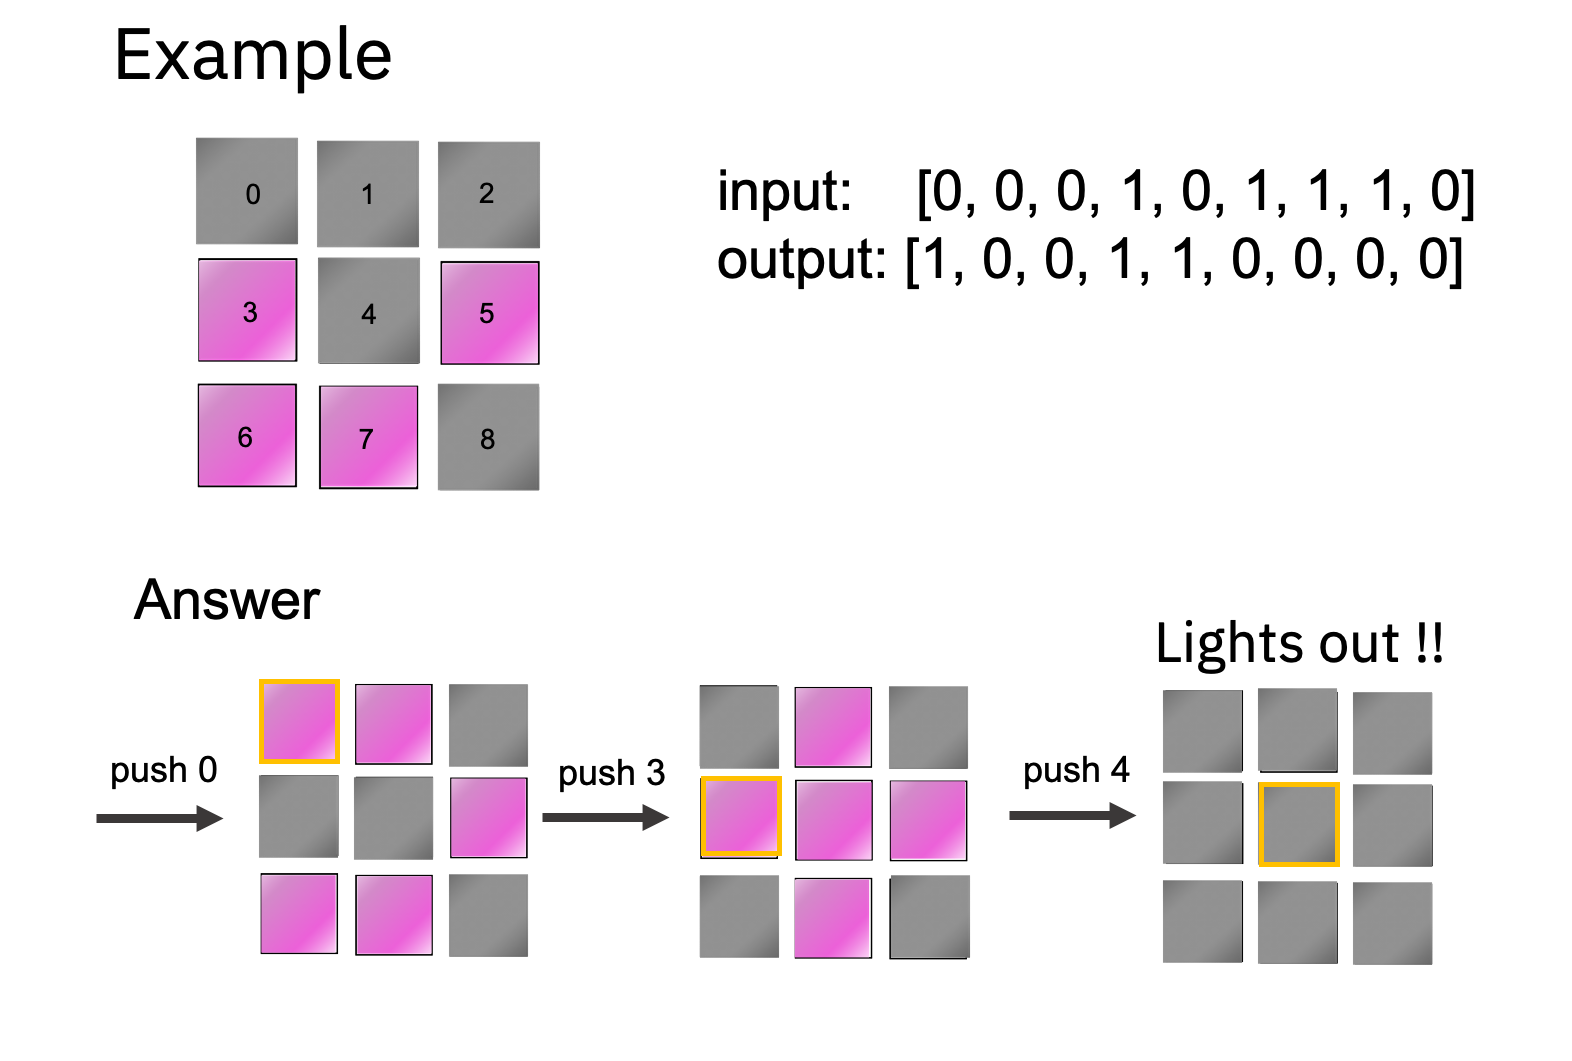

In [2]:
from IPython.display import Image, display
Image('lights_out_rule.png', width=1000)

Давайте попробуем решить головоломку используя **алгоритм Гровера**! 

Начальное условие:

In [3]:
# The starting pattern is represented by this list of numbers.
lights = [0, 1, 1, 1, 0, 0, 1, 1, 1]

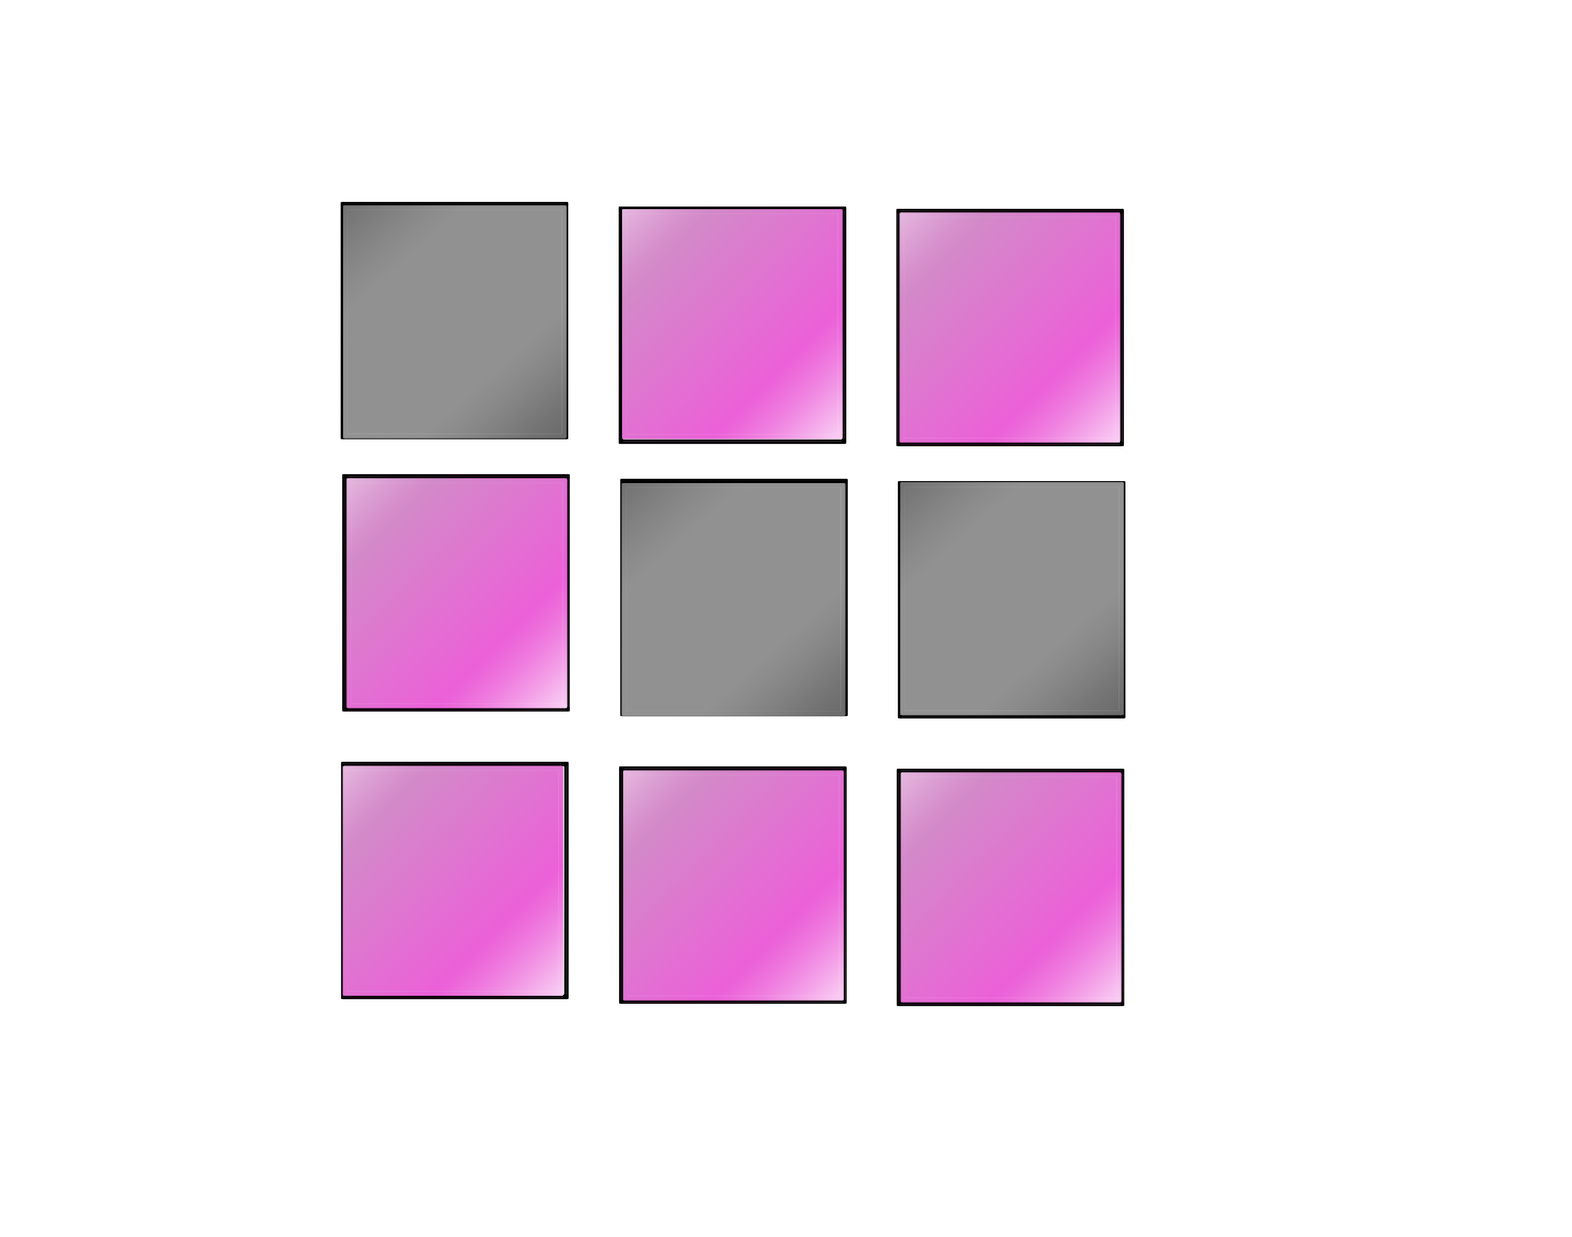

In [4]:
Image('lights_out_prob.png', width=500)

In [5]:
from qiskit import IBMQ, BasicAer, Aer
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute
from qiskit.tools.visualization import plot_histogram
import matplotlib.pyplot as plt
%matplotlib inline

from math import floor, sqrt, pi

In [6]:

def answer_func(lights, iter_num):        
    control = QuantumRegister(9)
    target = QuantumRegister(9)
    oracle = QuantumRegister(1)
    cr = ClassicalRegister(9)
    qc = QuantumCircuit(control, target, oracle, cr)
    
    # preparing state
    for i in range(9):
        if(lights[i]!=1):
            qc.x(target[i])
            
    qc.barrier()
    
    # creating superposition
    qc.h(control[:]) 
    qc.x(oracle[0])
    qc.h(oracle[0])
    qc.barrier()
    
    for j in range(iter_num):
    
        # creating the oracle
        qc.cx(control[0], target[0])
        qc.cx(control[0], target[1])
        qc.cx(control[0], target[3])

        qc.cx(control[1], target[0])
        qc.cx(control[1], target[1])
        qc.cx(control[1], target[2])
        qc.cx(control[1], target[4])

        qc.cx(control[2], target[1])
        qc.cx(control[2], target[2])
        qc.cx(control[2], target[5])

        qc.cx(control[3], target[0])
        qc.cx(control[3], target[3])
        qc.cx(control[3], target[4])
        qc.cx(control[3], target[6])

        qc.cx(control[4], target[1])
        qc.cx(control[4], target[3])
        qc.cx(control[4], target[4])
        qc.cx(control[4], target[5])
        qc.cx(control[4], target[7])

        qc.cx(control[5], target[2])
        qc.cx(control[5], target[4])
        qc.cx(control[5], target[5])
        qc.cx(control[5], target[8])

        qc.cx(control[6], target[3])
        qc.cx(control[6], target[6])
        qc.cx(control[6], target[7])

        qc.cx(control[7], target[4])
        qc.cx(control[7], target[6])
        qc.cx(control[7], target[7])
        qc.cx(control[7], target[8])

        qc.cx(control[8], target[5])
        qc.cx(control[8], target[7])
        qc.cx(control[8], target[8])
        
        
        qc.barrier()
        qc.mct(target[:], oracle[0])
        qc.barrier()
        
        #Uncomputation
        qc.cx(control[8], target[8])
        qc.cx(control[8], target[7])
        qc.cx(control[8], target[5])

        qc.cx(control[7], target[8])
        qc.cx(control[7], target[7])
        qc.cx(control[7], target[6])
        qc.cx(control[7], target[4])

        qc.cx(control[6], target[7])
        qc.cx(control[6], target[6])
        qc.cx(control[6], target[3])

        qc.cx(control[5], target[8])
        qc.cx(control[5], target[5])
        qc.cx(control[5], target[4])
        qc.cx(control[5], target[2])

        qc.cx(control[4], target[7])
        qc.cx(control[4], target[5])
        qc.cx(control[4], target[4])
        qc.cx(control[4], target[3])
        qc.cx(control[4], target[1])

        qc.cx(control[3], target[6])
        qc.cx(control[3], target[4])
        qc.cx(control[3], target[3])
        qc.cx(control[3], target[0])

        qc.cx(control[2], target[5])
        qc.cx(control[2], target[2])
        qc.cx(control[2], target[1])

        qc.cx(control[1], target[4])
        qc.cx(control[1], target[2])
        qc.cx(control[1], target[1])
        qc.cx(control[1], target[0])

        qc.cx(control[0], target[3])
        qc.cx(control[0], target[1])
        qc.cx(control[0], target[0])
        qc.barrier()

        # diffusion
        qc.h(control[:])
        qc.x(control[:])
        qc.h(control[8])
        qc.mct(control[0:8], control[8])
        qc.h(control[8])
        qc.x(control[:])
        qc.h(control[:])
        
        qc.barrier()
    
    
    qc.h(oracle[0])
    qc.x(oracle[0])
    qc.measure(control,cr)
    return qc

In [7]:
qc = answer_func(lights, 1)

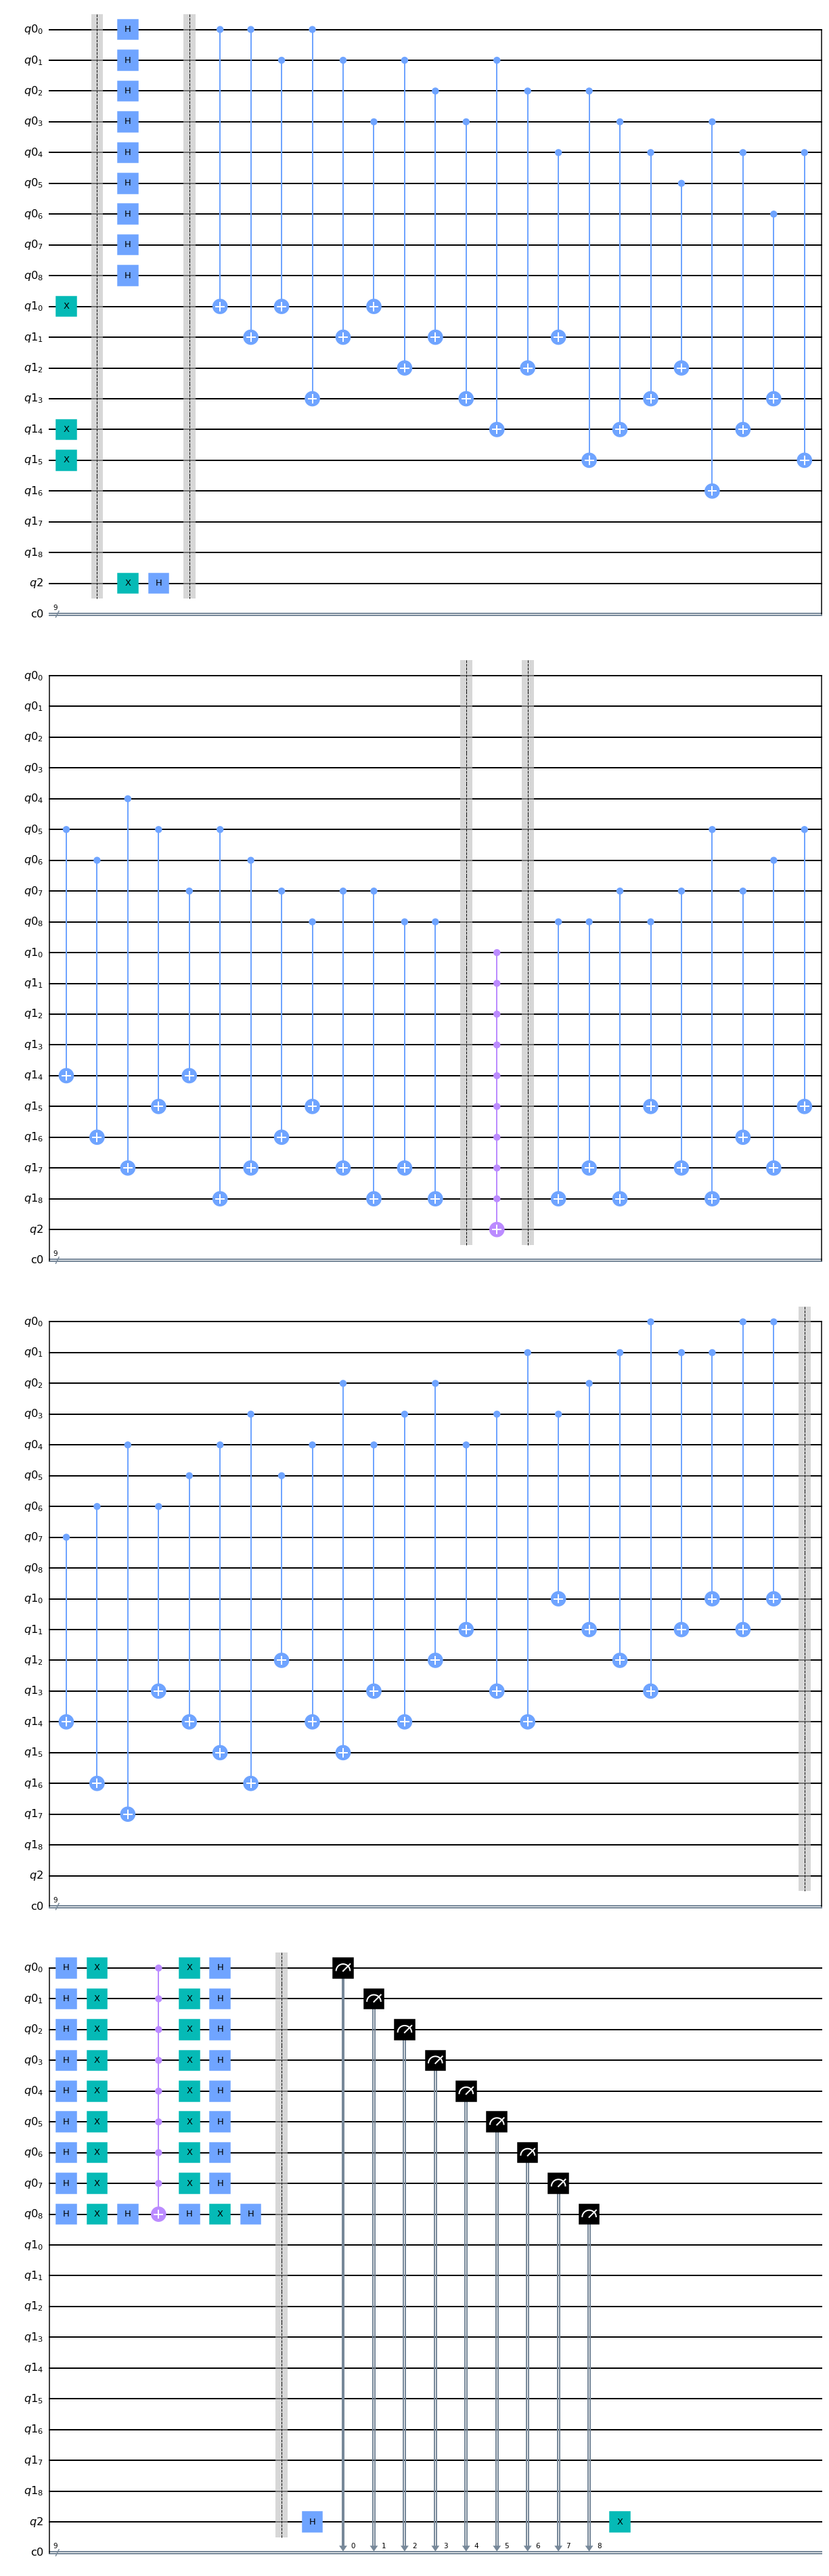

In [8]:
qc.draw('mpl')

In [9]:
backend = BasicAer.get_backend('qasm_simulator')
shots = 2048
results = execute(qc, backend=backend, shots=shots).result()
answer = results.get_counts()

In [10]:
answer

{'000110110': 4,
 '111010010': 3,
 '101111101': 4,
 '001010011': 4,
 '101001011': 4,
 '110111101': 6,
 '001100100': 8,
 '110010000': 4,
 '110011001': 4,
 '001010110': 2,
 '000000011': 6,
 '010000110': 4,
 '110110001': 4,
 '110011101': 4,
 '100011110': 2,
 '001111111': 5,
 '001000001': 8,
 '000010110': 6,
 '110000110': 4,
 '111000110': 6,
 '111011001': 3,
 '010011001': 3,
 '011110100': 4,
 '100101101': 4,
 '000011100': 5,
 '100011101': 5,
 '101001100': 7,
 '000000110': 1,
 '011010100': 6,
 '111000011': 4,
 '011101100': 6,
 '001001001': 2,
 '000111111': 5,
 '001010001': 5,
 '001100111': 4,
 '001101101': 3,
 '000001110': 7,
 '110110100': 7,
 '010010011': 6,
 '111100000': 7,
 '101001010': 2,
 '010011011': 7,
 '111100011': 6,
 '101101011': 4,
 '011111000': 8,
 '000101010': 8,
 '111001100': 7,
 '011011100': 4,
 '001110111': 4,
 '011010111': 6,
 '110001111': 8,
 '111000001': 6,
 '000110011': 1,
 '111110100': 5,
 '101100010': 3,
 '011110000': 5,
 '101001110': 3,
 '010101100': 2,
 '001010010': 

В этой задаче мы имеем дело с несколькими двоичными данными одновременно.
Мы должны определить, разрешима ли каждая из данных четырех досок при заданных ограничениях, поэтому давайте разработаем квантовую схему, чтобы решить их все одновременно.

В качестве примера, давайте рассмотрим, как найти доску, которую можно погасить одним нажатием кнопки из 4-х досок, указанных ниже. Начальное состояние 4 досок задается в следующем двумерном массиве, где «0» и «1» представляют «выключено» и «включено» соответственно, аналогично предыдущей задаче обучения:

lightout4_ex=\[\[Доска 0\],\[Доска 1\],\[Доска 2\],\[Доска 3\]\]

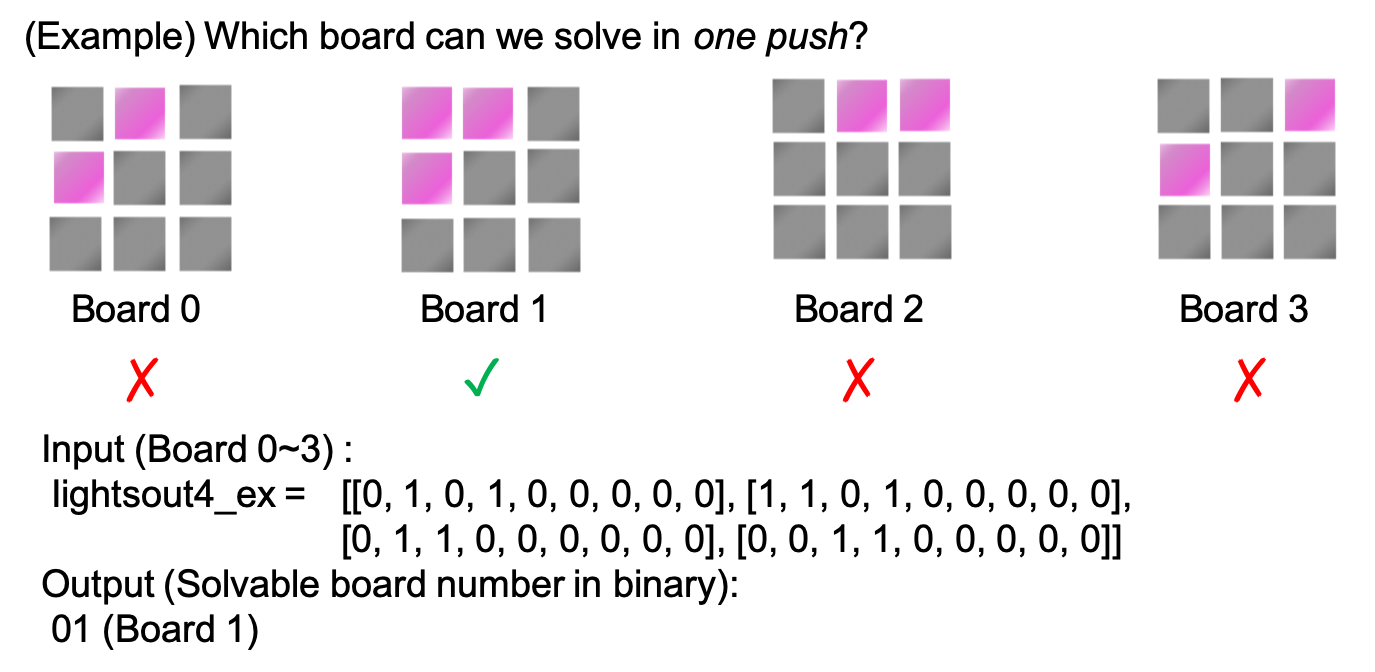

In [11]:
from IPython.display import Image, display
Image('4lightsout_ex.png')

## Стратегия решения
Если дана только одна доска, это задача ее решения.
Используя алгоритм из первой головоломки, вы можете решить эту проблему.
 
Если нам дадут несколько досок, будет несколько подходов.
1. Повторить один и тот же «алгоритм одной доски» для каждой доски.
2. Хранить информацию для нескольких досок одновременно и решать задачи за один прогон (однократное выполнение алгоритма).
- В остальной части этого документа мы обсуждаем, как использовать последний подход для решения этого типа проблем.

Во-первых, как хранить данные для всех досок одновременно?
1. Простые структуры данных: 　　9 кубитов на плату * 4 платы > 32 кубита (верхний предел ibm_qasm_simulator).
2. Подготовить состояние суперпозиции: $\vert Board 0\rangle + \vert Board 1\rangle + \vert Board 2\rangle + \vert Board 3\rangle$.
    - Конфигурация схемы, используемая для генерации состояний, нетривиальна.
3. *qRAM* известно как одно из решений.
    - **Плюсы**: интуитивно понятная реализация.
    - **Минусы**: высокие вычислительные затраты.

Конечно, вы можете придумать и использовать другие разумные способы сделать это.

Здесь мы сосредоточимся на *qRAM* и опишем ее конфигурацию и реализацию.

## qRAM: квантовая оперативная память

В классических компьютерах ОЗУ (оперативное запоминающее устройство) представляет собой тип энергозависимой памяти, которая имеет адреса памяти $j$ и хранит двоичные данные, соответствующие каждому адресу $D_j$.

В случае [qRAM](https://arxiv.org/abs/0708.1879) в квантовом компьютере адресные кубиты $a$ имеют $N$-адреса как суперпозицию, а соответствующие двоичные данные хранятся в кубитах данных $ d$ как вектор состояния.
$$
\sum_{j}\frac{1}{\sqrt{N}}\vert j \rangle_{a}\vert 0 \rangle_{d}\xrightarrow{qRAM}\sum_{j}\frac{1}{\sqrt{N}}\vert j \rangle_{a}\vert D_{j} \rangle_{d}
$$
Мы называем состояние правой части «qRAM», а соответствующую операцию вентиля — «операцией qRAM».

Хотя для работы qRAM требуются вентили $\mathcal{O}(N\log N)$, ее можно использовать для интуитивного создания состояний суперпозиции двоичных данных.

qRAM ранее применялась к различным алгоритмам квантового машинного обучения, таким как алгоритм HHL. Для этой задачи применим qRAM к алгоритму Гровера.

## Пример: считать данные из qRAM
Подготовьте qRAM из $n$-адресов, в которых числа $k_0, k_1, .. , k_{n-1}$ хранятся в указанном порядке.
Найдите адрес, по которому хранится число $m$, используя алгоритм Гровера.
- $n = 4$
- $к = [1,2,5,7]$
- $м = 7$


{'01010': 260, '10101': 246, '11111': 248, '00001': 270}


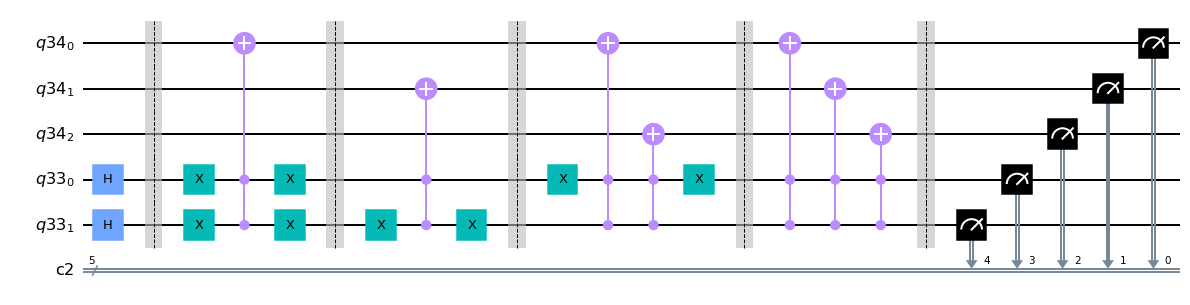

In [13]:
address = QuantumRegister(2)
data = QuantumRegister(3)
c = ClassicalRegister(5)
qc = QuantumCircuit(address,data,c)

# address preparation
qc.h([address[0],address[1]])
qc.barrier()
# address 0 -> data = 1
qc.x([address[0],address[1]])
qc.ccx(address[0],address[1],data[2])
qc.x([address[0],address[1]])
qc.barrier()
# address 1 -> data = 2
qc.x(address[0])
qc.ccx(address[0],address[1],data[1])
qc.x(address[0])
qc.barrier()
# address 2 -> data = 5
qc.x(address[1])
qc.ccx(address[0],address[1],data[2])
qc.ccx(address[0],address[1],data[0])
qc.x(address[1])
qc.barrier()
# address 3 -> data = 7
qc.ccx(address[0],address[1],data[2])
qc.ccx(address[0],address[1],data[1])
qc.ccx(address[0],address[1],data[0])
qc.barrier()


#Check the qRAM　status
qc.measure(address[0:2], c[0:2])
qc.measure(data[0:3], c[2:5])
 
# Reverse the output string.
qc = qc.reverse_bits()

#backend = provider.get_backend('ibmq_qasm_simulator')
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend=backend, shots=1024, seed_simulator=12345)
result = job.result()
count =result.get_counts()
print(count)

qc.draw(output='mpl')

### Поиск данных qRAM
Для выполнения алгоритма Гровера мы инвертируем знак **адресного регистра**, содержащего $m$. Нам также необходимо инициализировать **кубит данных** другой операцией qRAM перед операцией Diffusion,

\begin{align*}
\vert j \rangle_{a}\vert D_{j} \rangle_{d} \vert - \rangle_{f}
\xrightarrow{oracle}  
\left \{
 \begin{array}{l}
-\vert j \rangle_{a}\vert D_{j} \rangle_{d} \vert - \rangle_{f},  D_{j} = m\\
\vert j \rangle_{a}\vert D_{j} \rangle_{d} \vert - \rangle_{f},  D_{j}  \neq m
 \end{array}
 \right.
 \xrightarrow{qRAM}
\left \{
 \begin{array}{l}
-\vert j \rangle_{a}\vert 0 \rangle_{d}\vert - \rangle_{f},  D_{j} = m \\
\vert j \rangle_{a}\vert 0 \rangle_{d}\vert - \rangle_{f},　D_{j}\neq m
 \end{array}
 \right.
 \end{align*}
 
где $f$ обозначает флаговый кубит.

В этом случае мы можем настроить работу оракула с помощью C3X gate

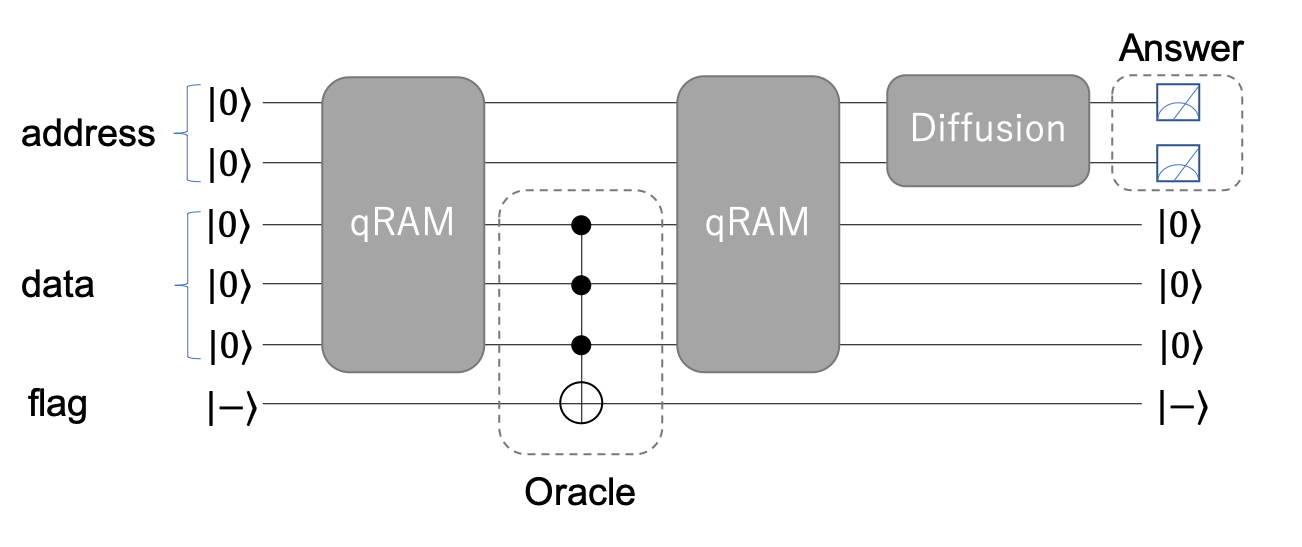

In [14]:
Image('circuit_ex.png')

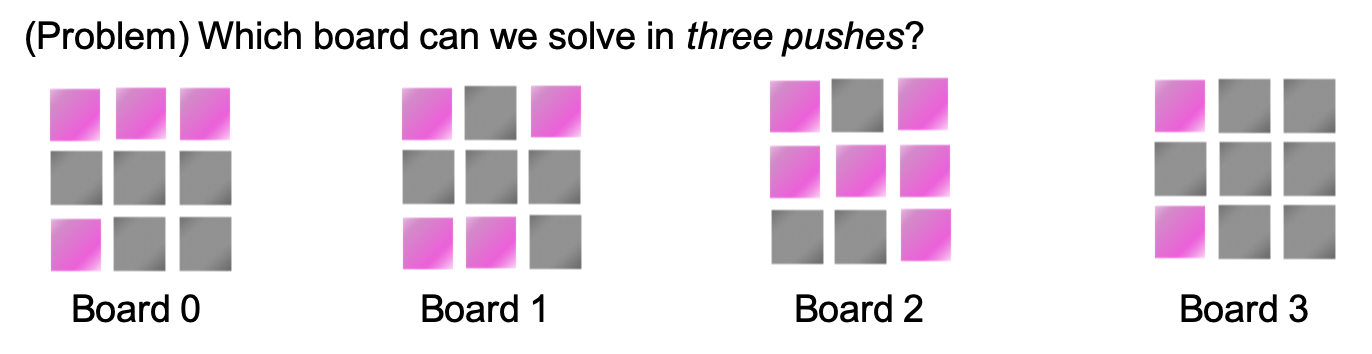

In [15]:
Image('4lightsout_pr.png')

In [16]:
lightsout4=[[1, 1, 1, 0, 0, 0, 1, 0, 0],[1, 0, 1, 0, 0, 0, 1, 1, 0],[1, 0, 1, 1, 1, 1, 0, 0, 1],[1, 0, 0, 0, 0, 0, 1, 0, 0]]

### Подсказки
- Измените оракул поиска данных qRAM на соответствующий.
- Сохранение/запись данных в *операции QRAM* может выполняться в любом порядке. Мы можем уменьшить количество вентилей, приняв во внимание _расстояние Хэмминга_ адреса и входных данных.